In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max.rows',169)
pd.set_option('display.max.columns',169)
pd.set_option('float_format', '{:.2f}'.format)

In [4]:
df = pd.read_csv('diabetes_data.csv', sep =';')

In [5]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [6]:
df.shape

(520, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [9]:
from collections import Counter

#drop the label 
outlier_list = df.drop('gender', axis = 1) 

def detect_outlier(df,feature):
    
    outlier_indices = []
    
    for f in feature:
        
        #lower quartile
        q1 = np.percentile(df[f],25)
        
        #upper quartile
        q3 = np.percentile(df[f],75)
        
        #interquartile range
        iqr = q3-q1
        
        #with coefficient
        with_coef = 1.5*iqr
        
        #detect outlier(s)
        lower_rule = q1-with_coef
        upper_rule = q3+with_coef
        
        outlier_variable = df[(df[f]<lower_rule) | (df[f]>upper_rule)].index
        outlier_indices.extend(outlier_variable)
    
    #converting to amount
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v>2)
    
    return multiple_outliers

 
#drop outliers
df = df.drop(detect_outlier(df,outlier_list),axis=0).reset_index(drop=True)

In [10]:
categ = df.drop('age', axis = 1)

In [13]:
def distributions(df, categ):
    plt.figure(figsize = (10,5))
    ax = sns.countplot(x = df[categ], hue=df['class'], data = df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[categ]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y),ha='center')
    plt.show()

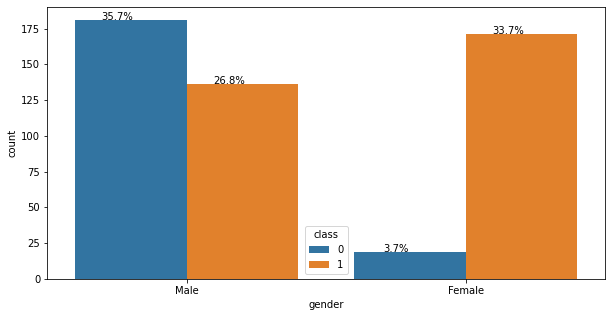

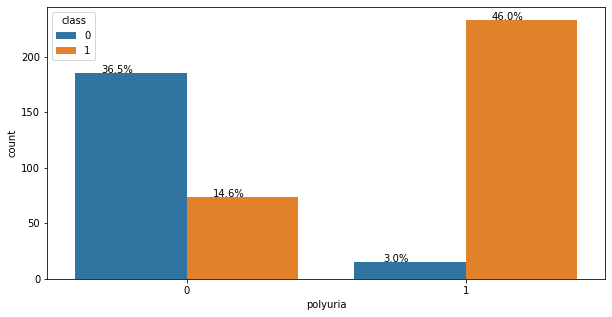

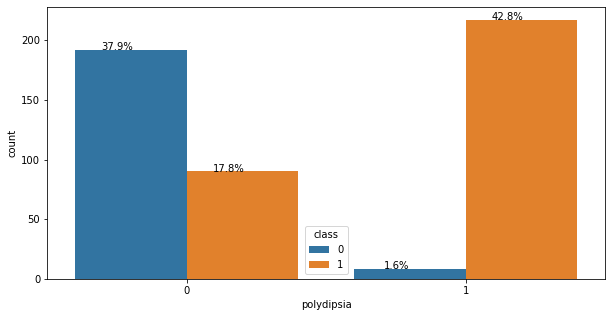

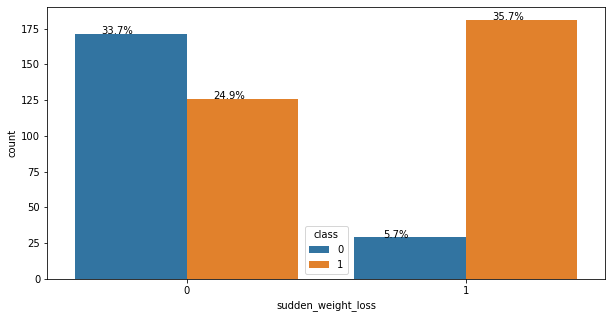

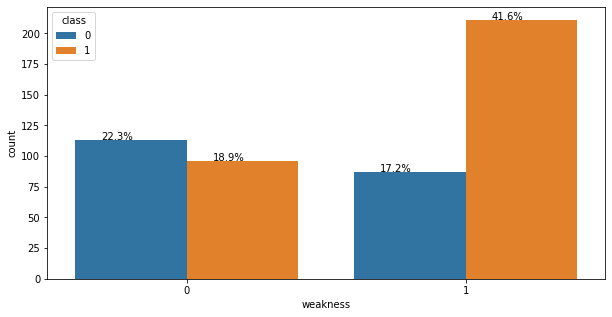

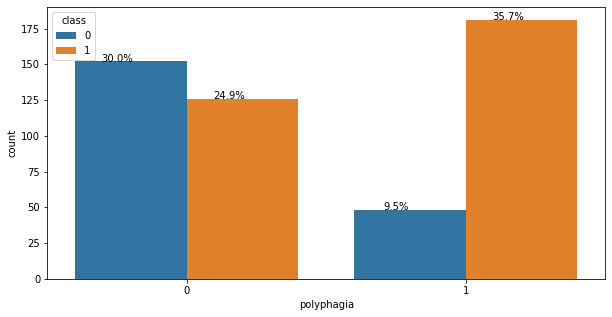

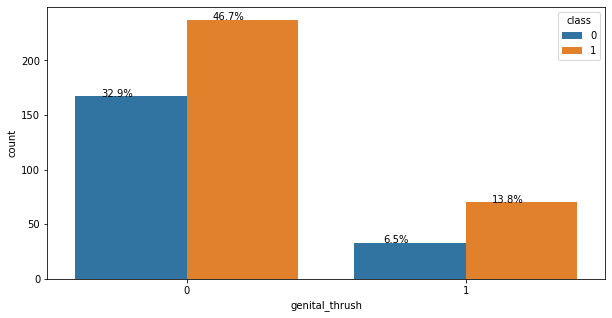

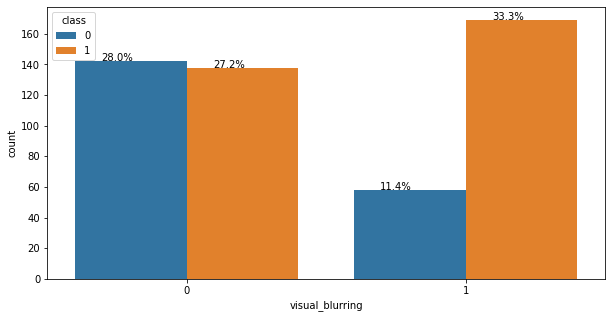

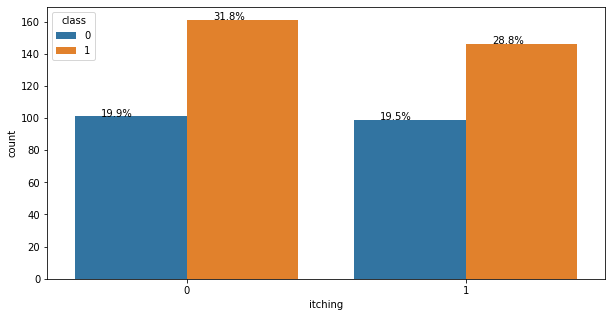

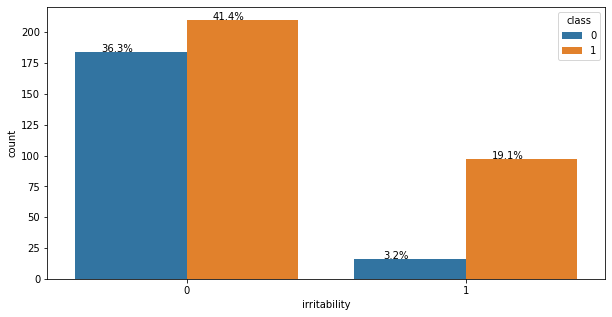

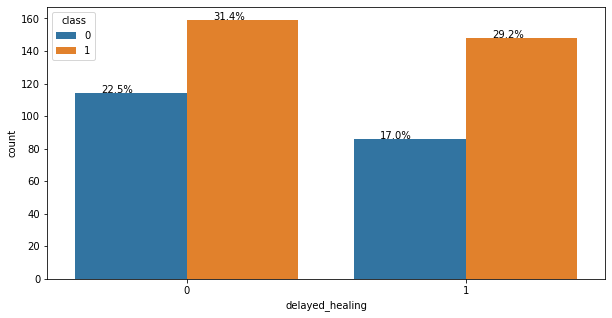

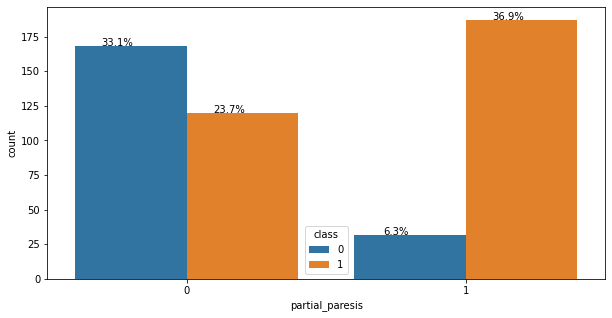

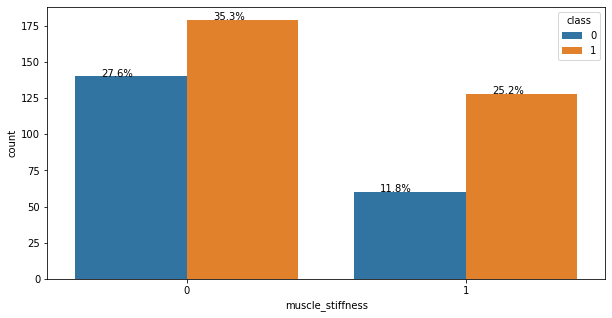

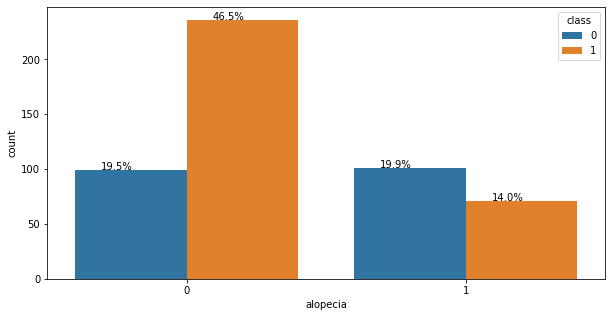

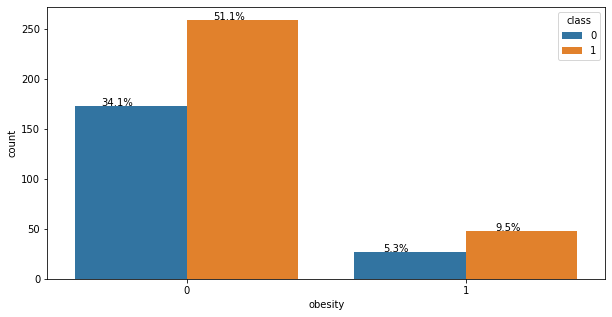

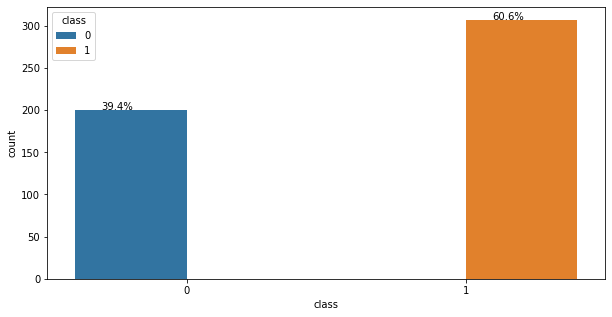

In [14]:
for i in categ:
    distributions(df,i)
    plt.show()

In [21]:
encoder = LabelEncoder()

In [22]:
df['gender']=encoder.fit_transform(df['gender'])

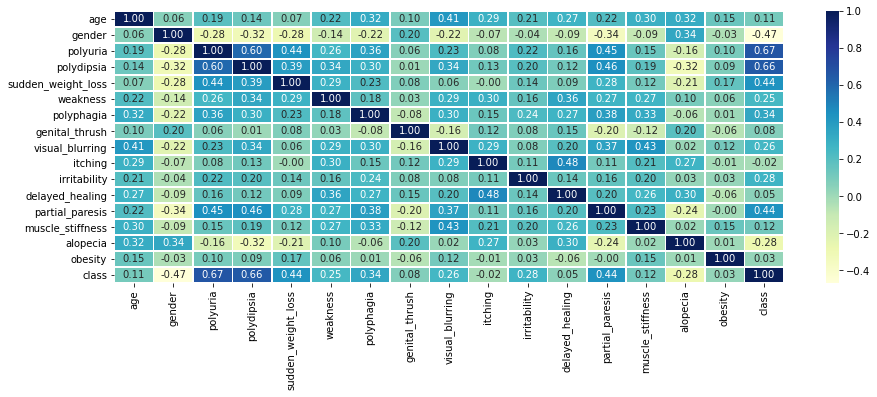

In [23]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu", linewidths=.5,fmt='.2f')
plt.show()

In [24]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=df['class'])


In [26]:
y_train.value_counts()

1    245
0    160
Name: class, dtype: int64

In [27]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [28]:
y_res.value_counts()

0    245
1    245
Name: class, dtype: int64

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [58]:
layers = [
    keras.layers.Dense(300, activation = 'relu',input_shape = X_res.shape[1:]),
    keras.layers.Dense(units = 200, activation='relu'),
    keras.layers.Dense(units = 2, activation='sigmoid')
]

model = keras.models.Sequential(layers)

In [59]:
print(model.layers[1])

In [66]:
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [67]:
history = model.fit(
    X_res,
    y_res,
    batch_size = 100,
    epochs = 30,
    validation_data = (X_test, y_test) # validation_split = 0.1
)

Epoch 1/30
5/5 [==============================] - 0s 27ms/step - loss: 0.6934 - accuracy: 0.5327 - val_loss: 0.6108 - val_accuracy: 0.6078
Epoch 2/30
5/5 [==============================] - 0s 7ms/step - loss: 0.5563 - accuracy: 0.7939 - val_loss: 0.5106 - val_accuracy: 0.8824
Epoch 3/30
5/5 [==============================] - 0s 6ms/step - loss: 0.5322 - accuracy: 0.7980 - val_loss: 0.5550 - val_accuracy: 0.6078
Epoch 4/30
5/5 [==============================] - 0s 12ms/step - loss: 0.6789 - accuracy: 0.5224 - val_loss: 0.7361 - val_accuracy: 0.4608
Epoch 5/30
5/5 [==============================] - 0s 6ms/step - loss: 0.6097 - accuracy: 0.6633 - val_loss: 0.5000 - val_accuracy: 0.8725
Epoch 6/30
5/5 [==============================] - 0s 6ms/step - loss: 0.5849 - accuracy: 0.6163 - val_loss: 0.7318 - val_accuracy: 0.4706
Epoch 7/30
5/5 [==============================] - 0s 12ms/step - loss: 0.6217 - accuracy: 0.5776 - val_loss: 0.5067 - val_accuracy: 0.6863
Epoch 8/30
5/5 [===============

In [68]:
acc_test = model.evaluate(X_test, y_test)
print(acc_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.8824
[0.4645892083644867, 0.8823529481887817]
